# Run 1st cycle model - for mCSPC patients

## Initialization

In [1]:
import pandas as pd
import sys 
import scipy as scipy

# Import my own libraries
sys.path.append("./local/")
import myUtils as utils
import initialize as initialize


done: set up models


## Fitting dynamics

In [2]:
#########################
#Set up data
#########################
print("init...")
dataDfName = "./data/MCC 19367_C1.xlsx"
txCols = ["GnRH","Abi","ARSI"]

patientIdDic ={2:'102',3:'103',4:'104',5:'105',6:'106',7:'107',8:'108',9:'109',10:'110',
              11:'111',12:'112',13:'113',14:'114',15:'115',16:'116',17:'117'}

#########################
#Set model and solver
# #########################
modelDic ={1:'modPCaSX'}
modelNum=1
modelName=modelDic[modelNum]

#fitting
nIterations = 1
n_sample = 400 #number of par sets for each patient
n_wins = 10 #number of winners from n_sample to take

################################
# Set and organize patient data
################################
from os.path import exists
outDir = "./output/"
dataDir=dataDfName

colorPalette = {"Testosterone": '#5ACD7D',"T":'#5ACD7D',"Testo": '#5ACD7D',
                "PSA": "#000000","PSAi": "#000000","P": "#000000",
                "S": '#00FDFF',"TumorSize": "#000000",
                "GnRH": "#0000FF","Abi": "#000000","ARSI": "#000000"}

######################################################
# Loop through patients and find best fit parameters
###################################################### 
outputCols=['PSAi'] 

fittingSpecs= pd.read_excel('./Parameters/Pars_'+modelName+'.xlsx','Fitting')
[fitting]=initialize.getFittingSpecs(fittingSpecs) 
my_fit=initialize.Fitting2(nIterations,n_sample,n_wins,fitting)

lArray=initialize.defineInitValues(patientIdDic,dataDir,my_fit)  
utils.patient_loop(patientIdDic,dataDir,lArray,modelName,txCols,colorPalette,outputCols,1,my_fit,outDir)#boolTinput


init...


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


102


100%|██████████| 400/400 [01:30<00:00,  4.42it/s]


plotting....


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


103


100%|██████████| 400/400 [03:45<00:00,  1.78it/s]


plotting....
104


100%|██████████| 400/400 [01:10<00:00,  5.64it/s]


plotting....
105


100%|██████████| 400/400 [01:19<00:00,  5.04it/s]


plotting....
106


100%|██████████| 400/400 [00:57<00:00,  7.01it/s]


plotting....
107


100%|██████████| 400/400 [01:13<00:00,  5.41it/s]


plotting....
108


100%|██████████| 400/400 [02:56<00:00,  2.26it/s]


plotting....
109


100%|██████████| 400/400 [01:12<00:00,  5.52it/s]


plotting....
110


100%|██████████| 400/400 [01:59<00:00,  3.36it/s]


plotting....
111


100%|██████████| 400/400 [01:04<00:00,  6.18it/s]


plotting....
112


100%|██████████| 400/400 [01:13<00:00,  5.45it/s]


plotting....
113


100%|██████████| 400/400 [01:38<00:00,  4.07it/s]


plotting....
114


100%|██████████| 400/400 [02:11<00:00,  3.04it/s]


plotting....
115


100%|██████████| 400/400 [01:00<00:00,  6.60it/s]


plotting....
116


100%|██████████| 400/400 [01:42<00:00,  3.90it/s]


plotting....
117


100%|██████████| 400/400 [01:02<00:00,  6.36it/s]


plotting....


## model fit visualization - all patients

/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


102
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(18.51) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(18.51) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(1078.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0397478181081164) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(47.0042229702959) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


103
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(7.54) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(7.54) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(323.7) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0034764870215142) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(2.2798363864523785) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


104
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(2.2) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(2.2) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(251.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0494349412187255) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(11.45942599958879) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


105
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(30.7) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(30.7) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(402.2) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0110553541087989) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(3.9057803787513903) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


106
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(27.42) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(27.42) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(321.7) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0605213635335449) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(1.0046909824091677) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


107
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(2.34) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(2.34) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(716.4) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0432417514248833) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(6.618013261415746) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


108
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(2.99) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(2.99) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(339.5) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0214663932555104) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(1.4455272034055362) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


109
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(8.99) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(8.99) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(895.9) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0571372279042803) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(48.793810085451625) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


110
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(7.82) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(7.82) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(478.3) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0113239254673923) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(8.189228937027272) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


111
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(46.03) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(46.03) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(291.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0533681585646074) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(1.3175916574716522) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


112
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(3.5100000000000002) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(3.5100000000000002) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(447.8) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0173695390033043) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(4.917922611381279) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


113
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(4.08) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(4.08) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(678.8) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0170287768801565) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(4.60398730506841) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


114
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(0.62) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(0.62) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(230.9) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0233224571395803) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(9.750153289892705) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


115
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(12.22) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(12.22) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(1007.15) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0259998531591523) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(6.223775124161841) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


116
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(8.0) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(8.0) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(475.16) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0188513513711869) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(43.72974207345486) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


117
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(25.87) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(25.87) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(1600.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0115076288554832) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(3.345670000473019) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


102
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(18.51) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(18.51) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(1078.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0397478181081164) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(47.0042229702959) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


103
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(7.54) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(7.54) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(323.7) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0034764870215142) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(2.2798363864523785) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


104
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(2.2) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(2.2) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(251.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0494349412187255) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(11.45942599958879) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


105
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(30.7) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(30.7) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(402.2) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0110553541087989) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(3.9057803787513903) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


106
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(27.42) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(27.42) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(321.7) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0605213635335449) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(1.0046909824091677) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


107
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(2.34) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(2.34) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(716.4) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0432417514248833) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(6.618013261415746) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


108
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(2.99) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(2.99) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(339.5) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0214663932555104) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(1.4455272034055362) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


109
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(8.99) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(8.99) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(895.9) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0571372279042803) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(48.793810085451625) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


110
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(7.82) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(7.82) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(478.3) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0113239254673923) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(8.189228937027272) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


111
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(46.03) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(46.03) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(291.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0533681585646074) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(1.3175916574716522) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


112
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(3.5100000000000002) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(3.5100000000000002) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(447.8) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0173695390033043) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(4.917922611381279) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


113
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(4.08) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(4.08) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(678.8) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0170287768801565) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(4.60398730506841) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


114
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(0.62) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(0.62) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(230.9) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0233224571395803) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(9.750153289892705) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


115
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(12.22) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(12.22) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(1007.15) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0259998531591523) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(6.223775124161841) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


116
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(8.0) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(8.0) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(475.16) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0188513513711869) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(43.72974207345486) (fixed), bounds=[-inf:inf]>)])


/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:97: RuntimeWarning: All-NaN axis encountered
  tmpT=np.nanmax(dataDf0['Testosterone'])
/Users/gallahja/Moffitt Cancer Center Dropbox/Jill Gallaher/0Trials/mCSPC_AT/early_progressors/source/early_progressors_code_FINAL/./local/initialize.py:98: RuntimeWarning: All-NaN axis encountered
  if(np.isnan(np.nanmax(dataDf0['Testosterone']))):


117
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(25.87) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(25.87) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(1600.0) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0115076288554832) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(3.345670000473019) (fixed), bounds=[-inf:inf]>)])


[None]

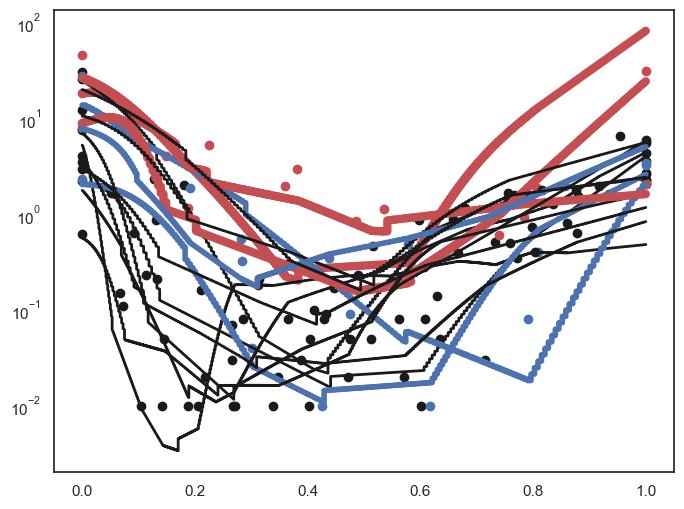

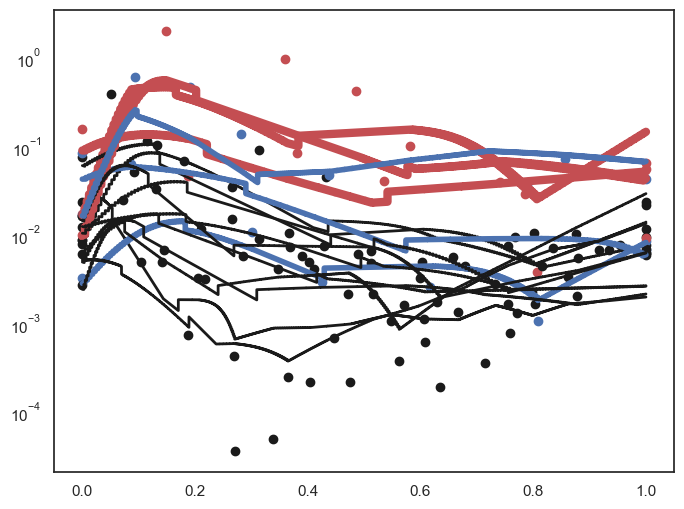

In [4]:
import os
import numpy as np
import models as mods
import odeFuns as odeFuns
import analysisFuns as aFuns
import matplotlib.pyplot as plt

patientIdDic ={2:'102',3:'103',4:'104',5:'105',6:'106',7:'107',8:'108',9:'109',10:'110',
              11:'111',12:'112',13:'113',14:'114',15:'115',16:'116',17:'117'}

solver_kws={'scaleTumourVolume':True, 'method':'DOP853', 'absErr':1.0e-6, 'relErr':1.0e-6, 'suppressOutputB':True}
cols=['r','k','k','k','b','b','k','r','k','r','k','k','k','k','b','k']
#patientIdDic={patIdNum:patientIdDic[patIdNum]}
boolTinput=True

#########################
#Set model and solver
# #########################

fittingSpecs= pd.read_excel('./Parameters/Pars_'+modelName+'.xlsx','Fitting')
[fitting]=initialize.getFittingSpecs(fittingSpecs) 
my_fit=initialize.Fitting2(1,1,1,fitting)
[fullDictionary,dictionary]=initialize.loadFullDictionary(modelName)#parDic
[model,outputFunction]=mods.pickModel(modelName)
modelSpecs= pd.read_excel('./Parameters/Pars_'+modelName+'.xlsx','modelSpecs')
[stateVarsNames,stateVarsType,pops0Input,pops0Output,pops0Type]=initialize.getModelSpecs(modelSpecs) 

varsV=[] 
varsC=[]
for name in fullDictionary.Name:
    entry=fullDictionary[fullDictionary.Name==name]
    if(entry.Type.iloc[0]=='V'):
        varsV.append(name)
    else:
        varsC.append(name)
varsNames=varsC+varsV

tmpModel = odeFuns.setupModel(stateVarsNames,stateVarsType,pops0Input,pops0Output,pops0Type,txCols,model,modelName,colorPalette,outputCols,outputFunction,dt=1)

#################
# Plot PSA
#################
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for pi, patInd in enumerate(patientIdDic):
    patientId = patientIdDic[patInd]

    dataDf = initialize.loadData(dataDfName,patientId)
    lArray=initialize.defineInitValues(patientIdDic,dataDir,my_fit)
    tx = utils.ExtractTxsFromDf(dataDf,txCols=txCols)

    parsFile=os.path.join(outDir,modelName,'parWins'+modelName+patientId+'.xlsx')
    tmp=pd.read_excel(parsFile)
    parDicAdd={'r_S':tmp['r_S'].iloc[0],'X0':tmp['X0'].iloc[0]}

    testo=[]
    if(boolTinput):
        nanT=np.isnan(dataDf['Testosterone'])
        if(nanT[0]):
            dataDf.loc[0,'Testosterone']=np.nanmax(dataDf['Testosterone'])
            nanT[0]=False
        dataDf['Tlog']=np.log10(dataDf['Testosterone'])
        f1T = scipy.interpolate.interp1d(dataDf.Days[~nanT],dataDf['Tlog'][~nanT],fill_value="extrapolate",kind="linear")#"extrapolate"
        teval=range(0,dataDf['Days'][len(dataDf['Days'])-1])
        testo=f1T(teval)
        testo=10**testo
        i=0
        tx=[]
        for d in teval:
            tx.append([d,d+1,dataDf['GnRH'].loc[i],dataDf['Abi'].loc[i],dataDf['ARSI'].loc[i]])
            if(d>=dataDf['Days'].loc[i+1]):
                i=i+1 

    topDf=aFuns.runSim(tmpModel,patientId,pi,lArray,parDicAdd,tx,my_fit,boolTinput,testo,solver_kws)
    tMax=290

    if(cols[pi]=='r'):lw=6
    elif(cols[pi]=='b'):lw=4
    else:lw=2

    plt.plot(topDf['Days']/topDf['Days'].iloc[-1],topDf['PSAi'],c=cols[pi],linewidth=lw)
    plt.scatter(dataDf['Days']/dataDf['Days'].iloc[-1],dataDf['PSA'],c=cols[pi])
ax.set(yscale='log')

#################
# Plot PSA/T
#################
fig, ax = plt.subplots(1, 1, figsize=(8,6))
for pi, patInd in enumerate(patientIdDic):
    patientId = patientIdDic[patInd]

    dataDf = initialize.loadData(dataDfName,patientId)
    lArray=initialize.defineInitValues(patientIdDic,dataDir,my_fit)
    tx = utils.ExtractTxsFromDf(dataDf,txCols=txCols)

    parsFile=os.path.join(outDir,modelName,'parWins'+modelName+patientId+'.xlsx')
    tmp=pd.read_excel(parsFile)
    parDicAdd={'r_S':tmp['r_S'].iloc[0],'X0':tmp['X0'].iloc[0]}

    testo=[]
    if(boolTinput):
        nanT=np.isnan(dataDf['Testosterone'])
        if(nanT[0]):
            dataDf.loc[0,'Testosterone']=np.nanmax(dataDf['Testosterone'])
            nanT[0]=False
        dataDf['Tlog']=np.log10(dataDf['Testosterone'])
        f1T = scipy.interpolate.interp1d(dataDf.Days[~nanT],dataDf['Tlog'][~nanT],fill_value="extrapolate",kind="linear")#"extrapolate"
        teval=range(0,dataDf['Days'][len(dataDf['Days'])-1])
        testo=f1T(teval)
        testo=10**testo
        i=0
        tx=[]
        for d in teval:
            tx.append([d,d+1,dataDf['GnRH'].loc[i],dataDf['Abi'].loc[i],dataDf['ARSI'].loc[i]])
            if(d>=dataDf['Days'].loc[i+1]):
                i=i+1 

    topDf=aFuns.runSim(tmpModel,patientId,pi,lArray,parDicAdd,tx,my_fit,boolTinput,testo,solver_kws)
    tMax=290

    if(cols[pi]=='r'):lw=6
    elif(cols[pi]=='b'):lw=4
    else:lw=2

    plt.plot(topDf['Days']/topDf['Days'].iloc[-1],topDf['PSAi']/topDf['T'],c=cols[pi],linewidth=lw)
    plt.scatter(dataDf['Days']/dataDf['Days'].iloc[-1],dataDf['PSA']/dataDf['Testosterone'],c=cols[pi])
ax.set(yscale='log')


109
Parameters([('C0', <Parameter 'C0', value=np.float64(1.0) (fixed), bounds=[-inf:inf]>), ('S0', <Parameter 'S0', value=np.float64(8.99) (fixed), bounds=[-inf:inf]>), ('d_AA', <Parameter 'd_AA', value=np.float64(0.25) (fixed), bounds=[-inf:inf]>), ('d_S', <Parameter 'd_S', value=np.float64(0.036) (fixed), bounds=[-inf:inf]>), ('P0', <Parameter 'P0', value=np.float64(8.99) (fixed), bounds=[-inf:inf]>), ('T0', <Parameter 'T0', value=np.float64(895.9) (fixed), bounds=[-inf:inf]>), ('r_S', <Parameter 'r_S', value=np.float64(0.0571372279042803) (fixed), bounds=[-inf:inf]>), ('X0', <Parameter 'X0', value=np.float64(48.793810085451625) (fixed), bounds=[-inf:inf]>)])


[None]

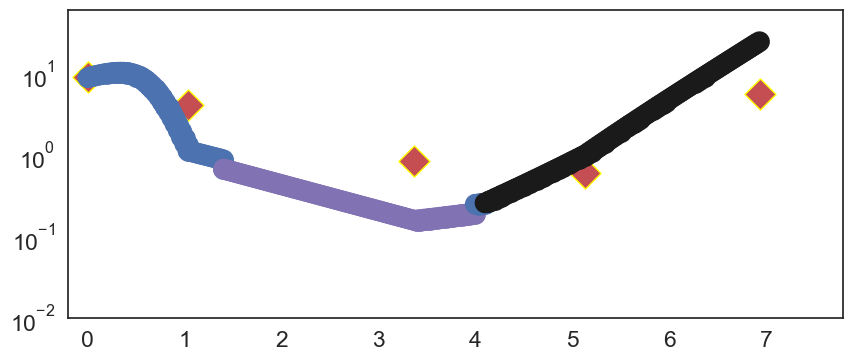

In [5]:
thisPlot='PSA'#'PSA'#'PT'
thisPat='109'#'105'#'109

#########################
#Set up data
#########################
import seaborn as sns
sns.set(style="white",
        font_scale=1.5,
        rc={'figure.figsize':(10,4)})

#dataDir=dataDfName
patientIdDic ={2:'102',3:'103',4:'104',5:'105',6:'106',7:'107',8:'108',9:'109',10:'110',
              11:'111',12:'112',13:'113',14:'114',15:'115',16:'116',17:'117'}

if(thisPat=='105'):
    patIdNum=5
    pi=3
else:
    patIdNum=9
    pi=7

patInd=0
patientIdDic={patIdNum:patientIdDic[patIdNum]}

#########################
#Set model and solver
# #########################
# varsV=[] 
# varsC=[]
# for name in fullDictionary.Name:
#     entry=fullDictionary[fullDictionary.Name==name]
#     if(entry.Type.iloc[0]=='V'):
#         varsV.append(name)
#     else:
#         varsC.append(name)
# varsNames=varsC+varsV

modelSpecs= pd.read_excel('./Parameters/Pars_'+modelName+'.xlsx','modelSpecs')
[stateVarsNames,stateVarsType,pops0Input,pops0Output,pops0Type]=initialize.getModelSpecs(modelSpecs) 

outputCols=['PSAi'] 
outDir = "./output/"#+modelName

patientId = list(patientIdDic.values())[patInd]
dataDf = initialize.loadData(dataDfName,patientId)
lArray=initialize.defineInitValues(patientIdDic,dataDir,my_fit)

parsFile=os.path.join(outDir,modelName,'parWins'+modelName+patientId+'.xlsx')
tmp=pd.read_excel(parsFile)
parDicAdd={'r_S':tmp['r_S'].iloc[0],'X0':tmp['X0'].iloc[0]}

tx = utils.ExtractTxsFromDf(dataDf,txCols=txCols)

testo=[]
if(boolTinput):
    nanT=np.isnan(dataDf['Testosterone'])
    if(nanT[0]):
        dataDf.loc[0,'Testosterone']=np.nanmax(dataDf['Testosterone'])
        nanT[0]=False
    dataDf['Tlog']=np.log10(dataDf['Testosterone'])
    f1T = scipy.interpolate.interp1d(dataDf.Days[~nanT],dataDf['Tlog'][~nanT],fill_value="extrapolate",kind="linear")#"extrapolate"
    teval=range(0,dataDf['Days'][len(dataDf['Days'])-1])
    testo=f1T(teval)
    testo=10**testo
    i=0
    tx=[]
    for d in teval:
        tx.append([d,d+1,dataDf['GnRH'].loc[i],dataDf['Abi'].loc[i],dataDf['ARSI'].loc[i]])
        if(d>=dataDf['Days'].loc[i+1]):
            i=i+1 

topDf=aFuns.runSim(tmpModel,patientId,patInd,lArray,parDicAdd,tx,my_fit,boolTinput,testo,solver_kws)

#del tMax
#tMax=290

if(cols[pi]=='r'):lw=6
elif(cols[pi]=='b'):lw=4
else:lw=2

fig, ax = plt.subplots(1, 1)
for t in range(0,len(topDf)):
    if(topDf['GnRH'].iloc[t]==1 and (topDf['Abi'].iloc[t]==1 or topDf['ARSI'].iloc[t]==1 )):
        col='m'
    elif(topDf['GnRH'].iloc[t]==1 and topDf['Abi'].iloc[t]==0):
        col='b'
    else:
        col='k'
    if(thisPlot=='PSA'):
        plt.plot(topDf['Days'].iloc[t:t+2]/30,topDf['PSAi'].iloc[t:t+2],c=col,linewidth=15)
    else:
        plt.plot(topDf['Days'].iloc[t:t+2]/30,topDf['PSAi'].iloc[t:t+2]/topDf['T'].iloc[t:t+2],c=col,linewidth=15)
if(thisPlot=='PSA'):
    plt.scatter(dataDf['Days']/30,dataDf['PSA'],c=cols[pi],s=250,edgecolors='yellow',marker='D')
else:
    plt.scatter(dataDf['Days']/30,dataDf['PSA']/dataDf['Testosterone'],c=cols[pi],s=250,edgecolors='yellow',marker='D')

#plt.ylim([-1,33])
ax.set_xlim([-.2,7.8])
if(thisPlot=='PT'):
    ax.set_ylim([.0001,10])
else:
    ax.set_ylim([.01,60])
ax.set(yscale='log')